In [5]:
# %%
# 1. Импорты
import zipfile
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import ydf

# %%
# 2. Распаковка архива
zip_path = Path("./house-prices-hw.zip")
data_dir = Path("./data")
data_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(data_dir)

# %%
# 3. Загрузка данных
train = pd.read_csv(data_dir / "train_hw.csv")
test  = pd.read_csv(data_dir / "test_hw.csv")


# %%
# 5. Разбиение на train/validation
train_set, val_set = train_test_split(train, test_size=0.2, random_state=42)
print(f"Train set shape:      {train_set.shape}")
print(f"Validation set shape: {val_set.shape}")


Train set shape:      (934, 81)
Validation set shape: (234, 81)


In [7]:

# %%
# 4. Быстрый обзор
print(train.head())
train.info()

# 6. Описание целевой переменной и её распределение
print(train["SalePrice"].describe())
train["SalePrice"] = np.log1p(train["SalePrice"])



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          20       RL          NaN     8750   Pave   NaN      IR1   
1   2         160       RM         24.0     2368   Pave   NaN      Reg   
2   3          60       RL         80.0     9760   Pave   NaN      Reg   
3   4         120       RM          NaN     4500   Pave   NaN      Reg   
4   5          80       RL          NaN    14112   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      8   2009        WD         Normal  11.90834

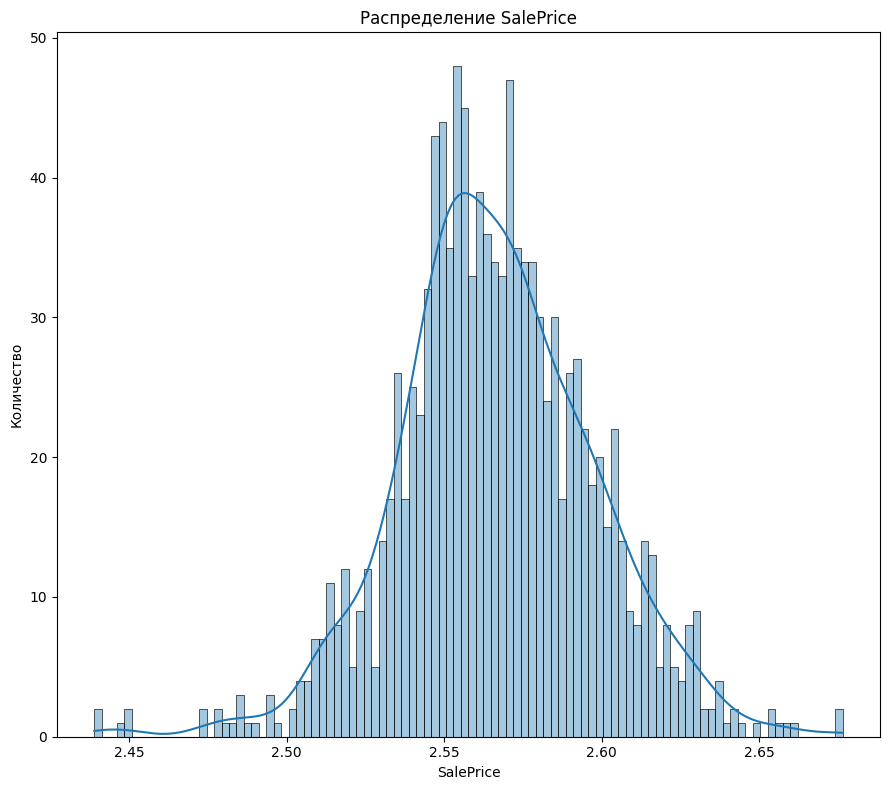

In [8]:

plt.figure(figsize=(9, 8))
sns.histplot(data=train, x="SalePrice", bins=100, kde=True, alpha=0.4)
plt.title("Распределение SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()



In [10]:
# %%
# 7. Числовые признаки и удаление идентификатора
df_num = train.select_dtypes(include=["float64", "int64"]).drop(columns=["Id"])
print(df_num.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20          NaN     8750            5            6       1970   
1         160         24.0     2368            5            6       1970   
2          60         80.0     9760            6            6       1964   
3         120          NaN     4500            6            5       1999   
4          80          NaN    14112            5            7       1964   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1970        76.0         828           0  ...           0   
1          1970       312.0         765           0  ...           0   
2          1964       360.0         674         106  ...         328   
3          1999       425.0         883           0  ...           0   
4          1964        86.0        1014           0  ...         227   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

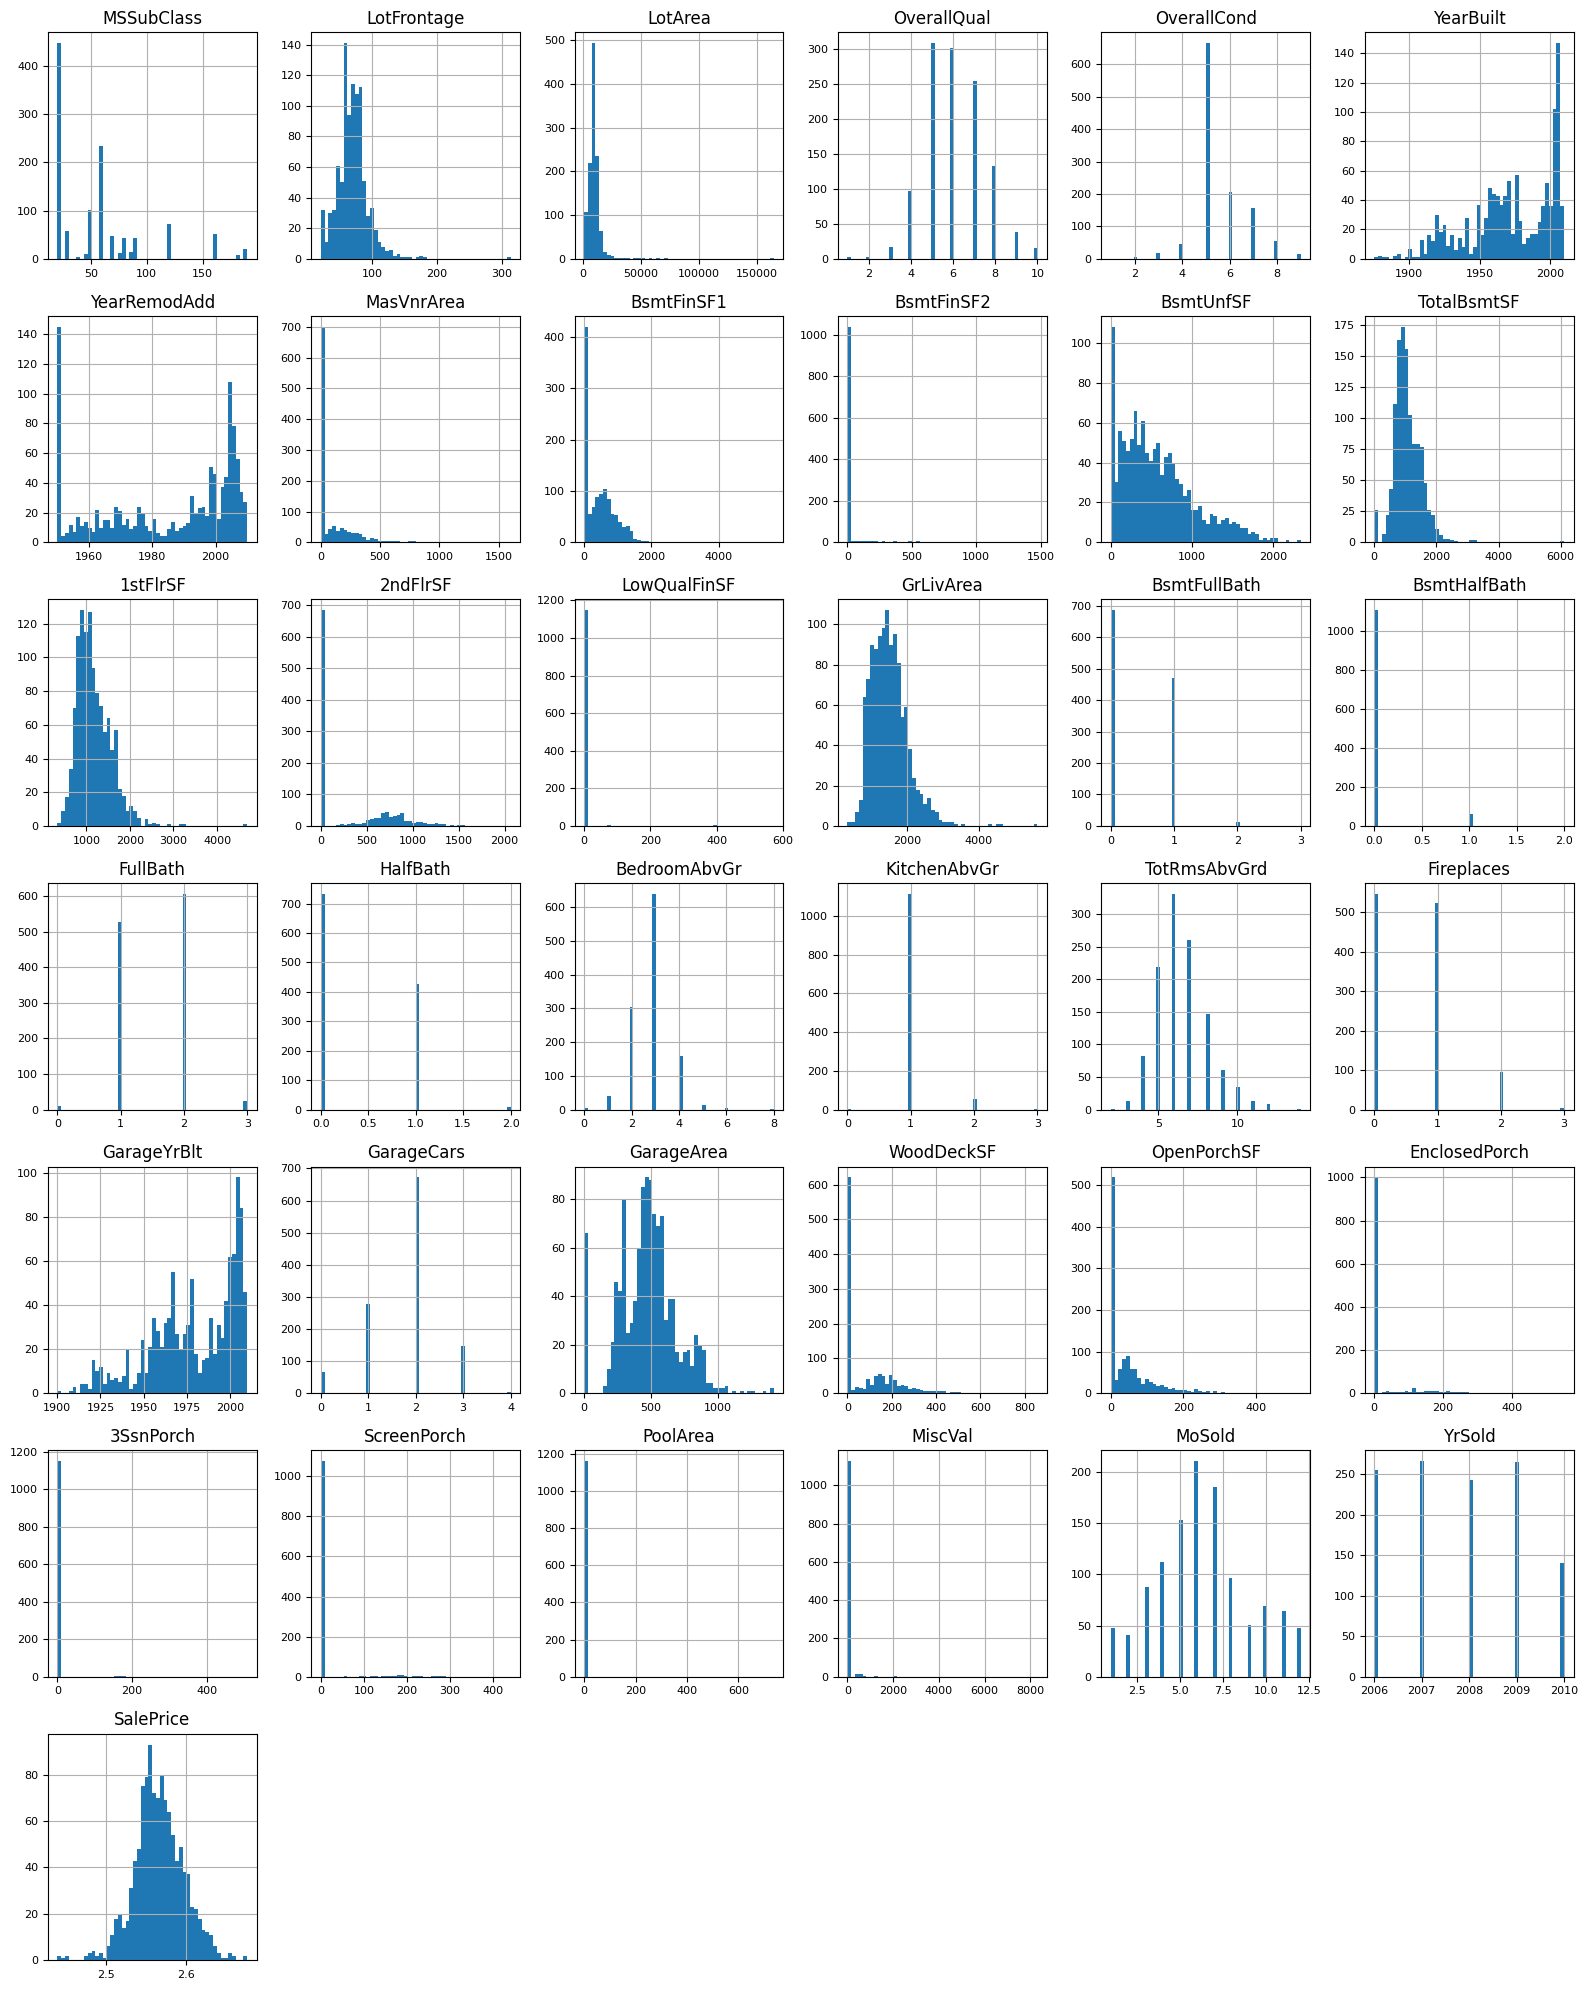

In [11]:
# %%
# 8. Гистограммы всех числовых признаков
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()


In [ ]:

# %%
# 9. Обучение модели Random Forest через YDF
learner = ydf.RandomForestLearner(label="SalePrice")
model   = learner.train(train_set )

# Печать краткого описания модели
print(model.describe())

# %%
# 10. Оценка модели и предсказания
print("Evaluation:", model.evaluate(val_set))

# %%

preds = model.predict(val_set)
print("Predictions:", preds[:10], "...")  # показываем первые 10 предсказаний

# %%
# 11. Анализ модели и бенчмарк
print("Analysis:",   model.analyze(val_set).to_file("analysis.html"))
print("Benchmark:",  model.benchmark(val_set))

